marwa ayed

In [1]:
import requests
from bs4 import BeautifulSoup

# URL of the website to scrape
url = "https://www.arteenz.com/cats.html"

# Send a GET request to the website
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract the title of the page
    title = soup.title.string
    print(f"Title: {title}")

    # Extract all text from the page
    text_content = soup.get_text()
    print("Text Content:")
    print(text_content)

    # Extract specific elements (e.g., all <p> tags)
    paragraphs = soup.find_all('p')
    for p in paragraphs:
        print(p.get_text())

    # Extract all links on the page
    links = soup.find_all('a')
    for link in links:
        print(f"Link: {link.get('href')} - Text: {link.get_text()}")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


Title: سعر الذهب اليومي
Text Content:










سعر الذهب اليومي












































Toggle navigation




سعر الذهب اليومي



الرئيسية
الأخبار
الإتصال بنا


English









  آخر تحديث قبل 4 دقائق
















سعر الذهب اليوم



 سعر الذهب اليوم في إسبانيا سعر الذهب اليوم في إندونيسيا سعر الذهب اليوم في إيران سعر الذهب اليوم في إيطاليا سعر الذهب اليوم في استراليا سعر الذهب اليوم في الاتحاد الاوروبي سعر الذهب اليوم في الاردن سعر الذهب اليوم في الامارات سعر الذهب اليوم في البحرين سعر الذهب اليوم في الجزائر سعر الذهب اليوم في الدنمارك سعر الذهب اليوم في السعودية سعر الذهب اليوم في السودان سعر الذهب اليوم في السويد سعر الذهب اليوم في الصومال سعر الذهب اليوم في العراق سعر الذهب اليوم في الكويت سعر الذهب اليوم في المانيا سعر الذهب اليوم في المغرب سعر الذهب اليوم في النرويج سعر الذهب اليوم في النمسا سعر الذهب اليوم في الهند سعر الذهب اليوم في الولايات المتحدة سعر الذهب اليوم في اليمن سعر الذهب اليوم في بريطانيا سعر الذهب اليوم في بلجيكا سعر الذهب اليوم في تركيا سع

In [5]:
# Find all cartoon series titles and links
cartoon_series = soup.find_all('a', href=True)  # Adjust the selector based on the HTML structure

for series in cartoon_series:
    if "cartooncat" in series['href']:  # Filter links containing "cartooncat"
        title = series.get_text(strip=True)
        link = series['href']
        print(f"Title: {title} - Link: {link}")

In [6]:
# Find all pagination links
pagination_links = soup.find_all('a', href=True)

for link in pagination_links:
    if "cats-pages" in link['href']:  # Filter links containing "cats-pages"
        print(f"Pagination Link: {link['href']} - Text: {link.get_text(strip=True)}")

In [7]:
import csv

# Prepare data
data = []
for series in cartoon_series:
    if "cartooncat" in series['href']:
        data.append({
            "Title": series.get_text(strip=True),
            "Link": series['href']
        })

# Save to CSV
with open('cartoon_series.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=["Title", "Link"])
    writer.writeheader()
    writer.writerows(data)

print("Data saved to cartoon_series.csv")

Data saved to cartoon_series.csv


In [ ]:
import json

# Save to JSON
with open('cartoon_series.json', 'w', encoding='utf-8') as file:
    json.dump(data, file, ensure_ascii=False, indent=4)

print("Data saved to cartoon_series.json")

Data saved to cartoon_series.json


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

# URL of the website to scrape
url = "https://www.arteenz.com/cats.html"

# Send a GET request to the website
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract the title of the page
    title = soup.title.string
    print(f"Title: {title}")

    # Find all cartoon series titles and links
    cartoon_series = []
    for link in soup.find_all('a', href=True):
        if "cartooncat" in link['href']:  # Filter links containing "cartooncat"
            series_title = link.get_text(strip=True)
            series_link = link['href']
            cartoon_series.append({
                "Title": series_title,
                "Link": f"https://www.arteenz.com/{series_link}"  # Construct full URL
            })

    # Print the extracted data
    print("Cartoon Series:")
    for series in cartoon_series:
        print(f"Title: {series['Title']} - Link: {series['Link']}")

    # Save the data to a CSV file
    with open('cartoon_series.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=["Title", "Link"])
        writer.writeheader()
        writer.writerows(cartoon_series)

    print("Data saved to cartoon_series.csv")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

Title: سعر الذهب اليومي
Cartoon Series:
Data saved to cartoon_series.csv


In [ ]:
import pandas as pd

In [ ]:
from io import StringIO

In [ ]:
data = '''
[
    {"title": "News Title 1", "description": "This is the description of the first news."},
    {"title": "News Title 2", "description": "This is the description of the second news."}
]
'''

# Load the data into a DataFrame
df = pd.read_json(StringIO(data), orient='records')

In [ ]:
df['text'] = df['title'] + ' ' + df['description']

In [ ]:
# Remove new lines
df['text'] = df['text'].str.replace('\n', ' ')

# Remove other unwanted characters (e.g., special symbols)
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)

# Convert to lowercase (optional)
df['text'] = df['text'].str.lower()

In [ ]:
print(df.head())

          title                                  description  \
0  News Title 1   This is the description of the first news.   
1  News Title 2  This is the description of the second news.   

                                                text  
0  news title 1 this is the description of the fi...  
1  news title 2 this is the description of the se...  


In [ ]:
# Step 1: Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Step 2: Instantiate TfidfVectorizer with specified parameters
vectorizer = TfidfVectorizer()

In [ ]:
# Step 3: Create the TF-IDF matrix using the 'title' column
matrix = vectorizer.fit_transform(df['title'])

In [ ]:
# Step 4: Print the list of terms included in the TF-IDF matrix
print("Terms in the TF-IDF matrix:")
print(vectorizer.get_feature_names_out())

Terms in the TF-IDF matrix:
['news' 'title']


In [ ]:
# Step 5: Display the size of the matrix
print("\nSize of the TF-IDF matrix:")
print(matrix.shape)


Size of the TF-IDF matrix:
(2, 2)


In [ ]:
# Step 1: Import required libraries
from sklearn.cluster import KMeans

In [ ]:
# Step 2: Instantiate the KMeans object
# Set n_clusters to the desired number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [ ]:
import pandas as pd
import re

# Données scrapées
data = [
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1179.html"},
    {"Title": "جاكي شان الموسم 5", "Link": "https://www.arteenz.com/cartooncat-1179.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1178.html"},
    {"Title": "العرض العادي الجزء 3", "Link": "https://www.arteenz.com/cartooncat-1178.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1177.html"},
    {"Title": "دامو ستحيل الجزء 4", "Link": "https://www.arteenz.com/cartooncat-1177.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1176.html"},
    {"Title": "قصص توم وجيري الجزء 2", "Link": "https://www.arteenz.com/cartooncat-1176.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1175.html"},
    {"Title": "نادي وينكس الموسم 1", "Link": "https://www.arteenz.com/cartooncat-1175.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1174.html"},
    {"Title": "دامو ستحيل الجزء 3", "Link": "https://www.arteenz.com/cartooncat-1174.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1173.html"},
    {"Title": "دان دير", "Link": "https://www.arteenz.com/cartooncat-1173.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1172.html"},
    {"Title": "ما الجديد يا سكوبي دو الجزء 1", "Link": "https://www.arteenz.com/cartooncat-1172.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1171.html"},
    {"Title": "فرقة العدالة الجزء 2", "Link": "https://www.arteenz.com/cartooncat-1171.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1170.html"},
    {"Title": "قصص توم وجيري الجزء 1", "Link": "https://www.arteenz.com/cartooncat-1170.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1169.html"},
    {"Title": "مغامرات تيدي راكسبن", "Link": "https://www.arteenz.com/cartooncat-1169.html"}
]

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Supprimer les entrées où le titre est vide
df = df[df['Title'] != '']

# Nettoyer les titres (supprimer les caractères spéciaux si nécessaire)
df['Title'] = df['Title'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Afficher les données nettoyées
print("Données nettoyées :")
print(df)

Données nettoyées :
                            Title  \
1               جاكي شان الموسم 5   
3            العرض العادي الجزء 3   
5              دامو ستحيل الجزء 4   
7           قصص توم وجيري الجزء 2   
9             نادي وينكس الموسم 1   
11             دامو ستحيل الجزء 3   
13                        دان دير   
15  ما الجديد يا سكوبي دو الجزء 1   
17           فرقة العدالة الجزء 2   
19          قصص توم وجيري الجزء 1   
21            مغامرات تيدي راكسبن   

                                            Link  
1   https://www.arteenz.com/cartooncat-1179.html  
3   https://www.arteenz.com/cartooncat-1178.html  
5   https://www.arteenz.com/cartooncat-1177.html  
7   https://www.arteenz.com/cartooncat-1176.html  
9   https://www.arteenz.com/cartooncat-1175.html  
11  https://www.arteenz.com/cartooncat-1174.html  
13  https://www.arteenz.com/cartooncat-1173.html  
15  https://www.arteenz.com/cartooncat-1172.html  
17  https://www.arteenz.com/cartooncat-1171.html  
19  https://www.arteenz.c

In [ ]:
import json
from collections import defaultdict

# Données extraites du site
data = [
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1179.html"},
    {"Title": "جاكي شان الموسم 5", "Link": "https://www.arteenz.com/cartooncat-1179.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1178.html"},
    {"Title": "العرض العادي الجزء 3", "Link": "https://www.arteenz.com/cartooncat-1178.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1177.html"},
    {"Title": "دامو ستحيل الجزء 4", "Link": "https://www.arteenz.com/cartooncat-1177.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1176.html"},
    {"Title": "قصص توم وجيري الجزء 2", "Link": "https://www.arteenz.com/cartooncat-1176.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1175.html"},
    {"Title": "نادي وينكس الموسم 1", "Link": "https://www.arteenz.com/cartooncat-1175.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1174.html"},
    {"Title": "دامو ستحيل الجزء 3", "Link": "https://www.arteenz.com/cartooncat-1174.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1173.html"},
    {"Title": "دان دير", "Link": "https://www.arteenz.com/cartooncat-1173.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1172.html"},
    {"Title": "ما الجديد يا سكوبي دو الجزء 1", "Link": "https://www.arteenz.com/cartooncat-1172.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1171.html"},
    {"Title": "فرقة العدالة الجزء 2", "Link": "https://www.arteenz.com/cartooncat-1171.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1170.html"},
    {"Title": "قصص توم وجيري الجزء 1", "Link": "https://www.arteenz.com/cartooncat-1170.html"},
    {"Title": "", "Link": "https://www.arteenz.com/cartooncat-1169.html"},
    {"Title": "مغامرات تيدي راكسبن", "Link": "https://www.arteenz.com/cartooncat-1169.html"}
]

# Regrouper par nom de série
grouped_series = defaultdict(list)

for item in data:
    title = item["Title"].strip()
    if title:
        parts = title.split(" ")
        base_name = " ".join(parts[:-2]) if parts[-2] in ["الموسم", "الجزء"] else title
        grouped_series[base_name].append({"Title": title, "Link": item["Link"]})

# Affichage du résultat formaté
print(json.dumps(grouped_series, indent=4, ensure_ascii=False))


{
    "جاكي شان": [
        {
            "Title": "جاكي شان الموسم 5",
            "Link": "https://www.arteenz.com/cartooncat-1179.html"
        }
    ],
    "العرض العادي": [
        {
            "Title": "العرض العادي الجزء 3",
            "Link": "https://www.arteenz.com/cartooncat-1178.html"
        }
    ],
    "دامو ستحيل": [
        {
            "Title": "دامو ستحيل الجزء 4",
            "Link": "https://www.arteenz.com/cartooncat-1177.html"
        },
        {
            "Title": "دامو ستحيل الجزء 3",
            "Link": "https://www.arteenz.com/cartooncat-1174.html"
        }
    ],
    "قصص توم وجيري": [
        {
            "Title": "قصص توم وجيري الجزء 2",
            "Link": "https://www.arteenz.com/cartooncat-1176.html"
        },
        {
            "Title": "قصص توم وجيري الجزء 1",
            "Link": "https://www.arteenz.com/cartooncat-1170.html"
        }
    ],
    "نادي وينكس": [
        {
            "Title": "نادي وينكس الموسم 1",
            "Link": "htt

In [ ]:
from nltk.corpus import stopwords
import nltk

# Télécharger les stop words en arabe
nltk.download('stopwords')

# Charger les stop words en arabe
stop_words = set(stopwords.words('arabic'))

# Ajouter des stop words personnalisés (optionnel)
custom_stop_words = ["الجزء", "الموسم", "يا", "في", "من", "على"]
stop_words.update(custom_stop_words)

# Supprimer les stop words des titres
df['Title'] = df['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem.isri import ISRIStemmer

# Initialiser le stemmer pour l'arabe
stemmer = ISRIStemmer()

# Appliquer le stemming aux titres
df['Title'] = df['Title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [ ]:
import nltk

# Télécharger les stop words en arabe
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re

# Nettoyer les titres
df['Title'] = df['Title'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Supprimer les caractères spéciaux
df['Title'] = df['Title'].apply(lambda x: re.sub(r'\d+', '', x))      # Supprimer les chiffres
df['Title'] = df['Title'].str.strip()                                 # Supprimer les espaces inutiles


Cluster 1:
نادي وينكس الموسم 1
دان دير
ما الجديد يا سكوبي دو الجزء 1
قصص توم وجيري الجزء 1
مغامرات تيدي راكسبن

Cluster 2:
قصص توم وجيري الجزء 2
فرقة العدالة الجزء 2

Cluster 3:
العرض العادي الجزء 3
دامو ستحيل الجزء 3

Cluster 4:
دامو ستحيل الجزء 4

Cluster 5:
جاكي شان الموسم 5


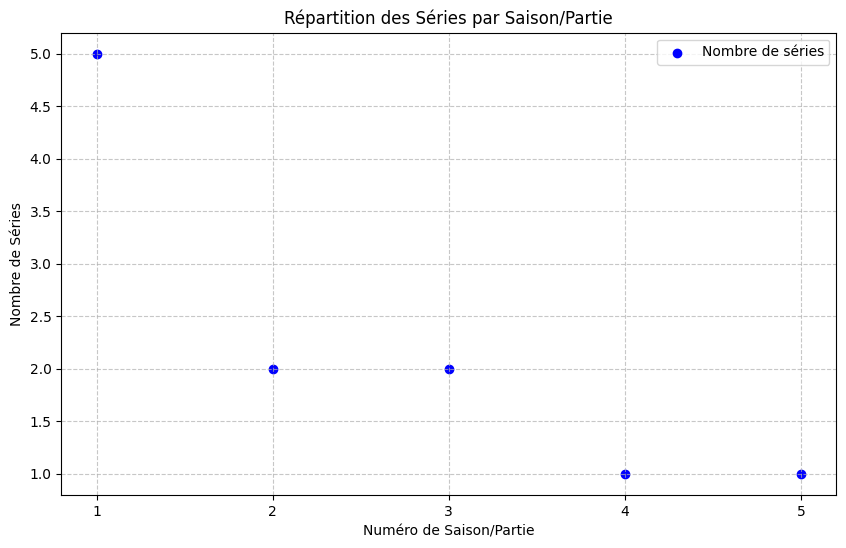

In [ ]:
import json
import re
import matplotlib.pyplot as plt
from collections import defaultdict

# Données extraites (remplace ceci par le chargement depuis un fichier si nécessaire)
data = [
    {"Title": "جاكي شان الموسم 5", "Link": "https://www.arteenz.com/cartooncat-1179.html"},
    {"Title": "العرض العادي الجزء 3", "Link": "https://www.arteenz.com/cartooncat-1178.html"},
    {"Title": "دامو ستحيل الجزء 4", "Link": "https://www.arteenz.com/cartooncat-1177.html"},
    {"Title": "قصص توم وجيري الجزء 2", "Link": "https://www.arteenz.com/cartooncat-1176.html"},
    {"Title": "نادي وينكس الموسم 1", "Link": "https://www.arteenz.com/cartooncat-1175.html"},
    {"Title": "دامو ستحيل الجزء 3", "Link": "https://www.arteenz.com/cartooncat-1174.html"},
    {"Title": "دان دير", "Link": "https://www.arteenz.com/cartooncat-1173.html"},
    {"Title": "ما الجديد يا سكوبي دو الجزء 1", "Link": "https://www.arteenz.com/cartooncat-1172.html"},
    {"Title": "فرقة العدالة الجزء 2", "Link": "https://www.arteenz.com/cartooncat-1171.html"},
    {"Title": "قصص توم وجيري الجزء 1", "Link": "https://www.arteenz.com/cartooncat-1170.html"},
    {"Title": "مغامرات تيدي راكسبن", "Link": "https://www.arteenz.com/cartooncat-1169.html"}
]

# Fonction pour extraire le numéro de saison/partie
part_pattern = re.compile(r'\b(?:الجزء|الموسم)\s*(\d+)')

def get_part_number(title):
    match = part_pattern.search(title)
    return int(match.group(1)) if match else 1  # Si pas de numéro, on met 1

# Regrouper les titres par saison
clusters = defaultdict(list)
for item in data:
    part = get_part_number(item["Title"])
    clusters[part].append(item["Title"])

# Affichage des résultats
for part, items in sorted(clusters.items()):
    print(f'\nCluster {part}:')
    print('\n'.join(items))

# Visualisation des clusters en nuage de points
parts = list(clusters.keys())
counts = [len(clusters[part]) for part in parts]

plt.figure(figsize=(10, 6))
plt.scatter(parts, counts, color='blue', label='Nombre de séries')
plt.xlabel('Numéro de Saison/Partie')
plt.ylabel("Nombre de Séries")
plt.title('Répartition des Séries par Saison/Partie')
plt.xticks(parts)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import json
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Données extraites (exemple)
data = [
    {"Title": "جاكي شان الموسم 5", "Link": "https://www.arteenz.com/cartooncat-1179.html"},
    {"Title": "العرض العادي الجزء 3", "Link": "https://www.arteenz.com/cartooncat-1178.html"},
    {"Title": "دامو ستحيل الجزء 4", "Link": "https://www.arteenz.com/cartooncat-1177.html"},
    {"Title": "قصص توم وجيري الجزء 2", "Link": "https://www.arteenz.com/cartooncat-1176.html"},
    {"Title": "نادي وينكس الموسم 1", "Link": "https://www.arteenz.com/cartooncat-1175.html"},
    {"Title": "دامو ستحيل الجزء 3", "Link": "https://www.arteenz.com/cartooncat-1174.html"},
    {"Title": "دان دير", "Link": "https://www.arteenz.com/cartooncat-1173.html"},
    {"Title": "ما الجديد يا سكوبي دو الجزء 1", "Link": "https://www.arteenz.com/cartooncat-1172.html"},
    {"Title": "فرقة العدالة الجزء 2", "Link": "https://www.arteenz.com/cartooncat-1171.html"},
    {"Title": "قصص توم وجيري الجزء 1", "Link": "https://www.arteenz.com/cartooncat-1170.html"},
    {"Title": "مغامرات تيدي راكسبن", "Link": "https://www.arteenz.com/cartooncat-1169.html"}
]

# Fonction pour extraire le numéro de saison/partie
part_pattern = re.compile(r'\b(?:الجزء|الموسم)\s*(\d+)')

def get_part_number(title):
    match = part_pattern.search(title)
    return int(match.group(1)) if match else 0  # Si pas de numéro, on met 0

# Regrouper les titres par saison
clusters = defaultdict(list)
titles = []
labels = []  # Liste des labels pour l'évaluation

for item in data:
    part = get_part_number(item["Title"])
    clusters[part].append(item["Title"])
    titles.append(item["Title"])
    labels.append(part)

# Convertir les titres en vecteurs TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(titles)

# Appliquer K-Means pour le clustering
kmeans = KMeans(n_clusters=len(clusters), random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Calcul du score de silhouette
if len(set(cluster_labels)) > 1:  # Silhouette nécessite au moins 2 clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Score de silhouette : {silhouette_avg:.3f}")
else:
    print("Impossible de calculer le score de silhouette (un seul cluster trouvé).")


Score de silhouette : 0.271
